# Blog Exploration, EDA of Full Blog Post Data Set

In [1]:
# Import Section
%matplotlib inline
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from helpers import make_word_cloud

In [2]:
# Load and set up data
posts = pd.read_pickle('picked_dfs/post_df_w_nmf.pkl')                                           # get data for posts
topics = pd.read_csv('topic_words_w_names.csv')                                       # get information on topics
posts = posts.merge(right=topics, how='left', left_on='main_topic', right_on='topic') # add topcic names to posts
posts.drop(['num_docs', 'important'], axis=1, inplace=True)                           # drop non needed merge stuff

In [3]:
# Column names to use for masking when looking through data
non_nlp_features = ['attachment_count', 'like_count', 'likes_enabled', 'number_of_post', 'sharing_enabled',\
                    'site_ID', 'sticky', 'day_of_week', 'year', 'month', 'num_comments', 'comments_enabled', \
                    'num_tags', 'num_cats', 'num_pub_urls', 'num_other_urls', 'standard_post', 'num_links', \
                    'num_images', 'success', 'main_topic', 'num_words', 'name']
nlp_features = ['lf0', 'lf1', 'lf2', 'lf3', 'lf4', 'lf5', 'lf6', 'lf7', 'lf8', 'lf9', 'lf10', 'lf11', 'lf12', \
                'lf13', 'lf14', 'lf15', 'lf16', 'lf17', 'lf18', 'lf19', 'lf20', 'lf21', 'lf22', 'lf23', 'lf24',\
                'lf25', 'lf26', 'lf27', 'lf28', 'lf29']

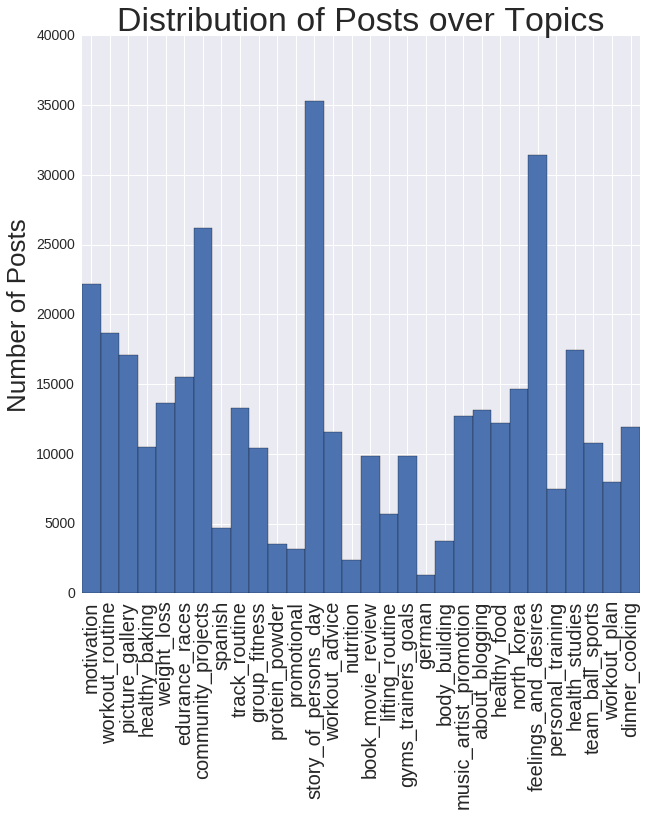

In [9]:
# Create plot and add data to it
fig, ax = plt.subplots(figsize=(10,10))
width = 1
ind = topics['topic']
num_docs = topics['num_docs']
ax.bar(ind, num_docs, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Posts', fontsize=26)
ax.set_title('Distribution of Posts over Topics', fontsize=34)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(topics['name'], rotation='vertical', fontsize=20)
plt.savefig('eda/docs_by_topics.png', bbox_inches='tight')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=14)

plt.show()

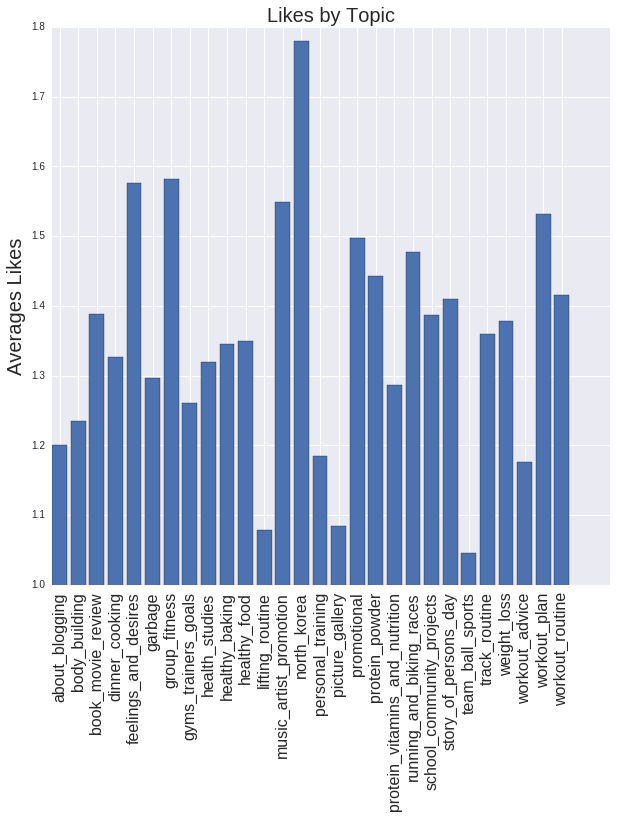

In [6]:
# Find out other stuff on topics


# Create plot and add data to it
fig, ax = plt.subplots(figsize=(10,10))
width = 0.8
average_likes = posts.groupby('name').mean()['like_count'].reset_index()['like_count']
xlabels = posts.groupby('name').mean()['like_count'].reset_index()['name']
ind = np.arange(len(average_likes))
ax.bar(ind, average_likes, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Averages Likes', fontsize=20)
ax.set_title('Likes by Topic', fontsize=20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(xlabels, rotation='vertical', fontsize=16)
ax.set_ylim((1,1.8))
plt.savefig('eda/likes_by_topic.png', bbox_inches='tight')

plt.show()

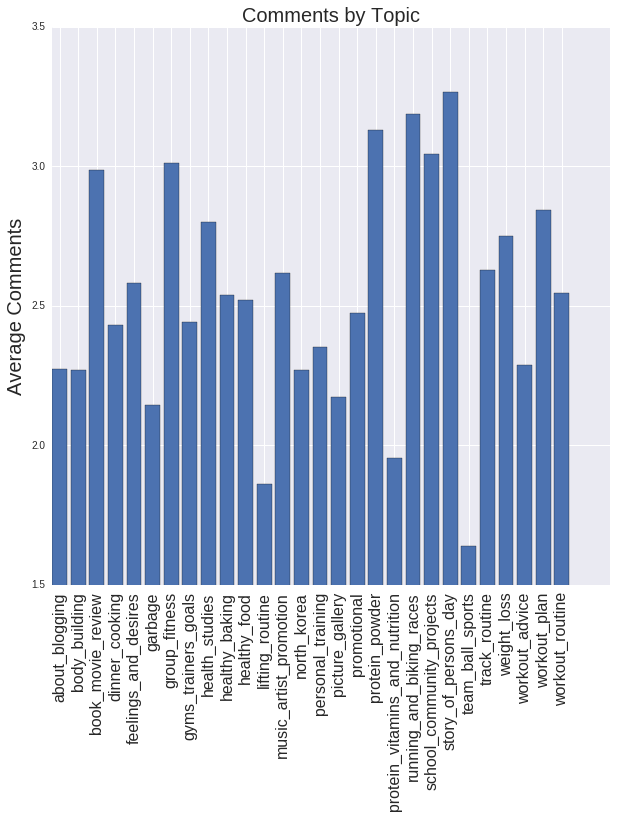

In [7]:
# Find out other stuff on topics


# Create plot and add data to it
fig, ax = plt.subplots(figsize=(10,10))
width = 0.8
average_likes = posts.groupby('name').mean()['num_comments'].reset_index()['num_comments']
xlabels = posts.groupby('name').mean()['num_comments'].reset_index()['name']
ind = np.arange(len(average_likes))
ax.bar(ind, average_likes, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Comments', fontsize=20)
ax.set_title('Comments by Topic', fontsize=20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(xlabels, rotation='vertical', fontsize=16)
ax.set_ylim((1.5,3.5))
plt.savefig('eda/comments_by_topic.png', bbox_inches='tight')

plt.show()

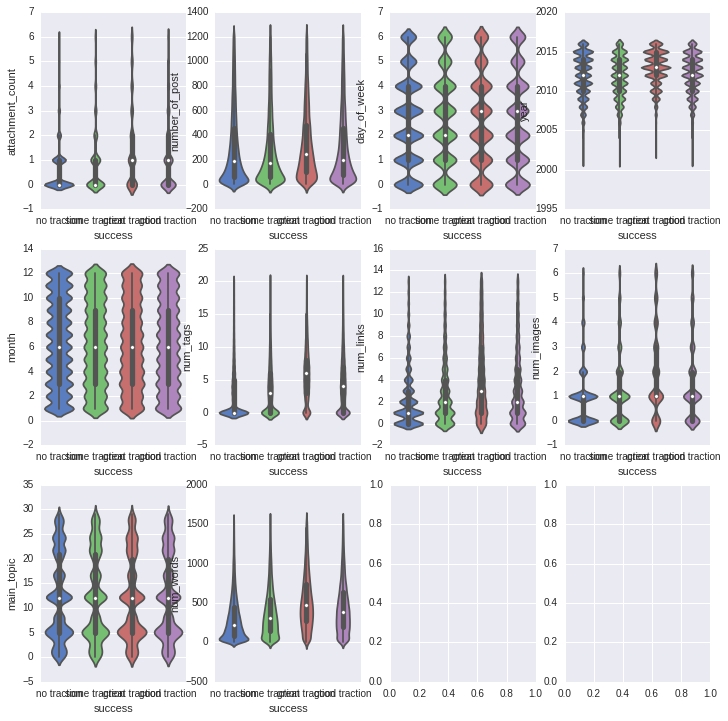

In [8]:
def is_outlier(points, thresh=4.0):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

interesting = ['attachment_count', 'number_of_post', 'day_of_week', 'year', 'month', \
               'num_tags', 'num_links', 'num_images', 'main_topic', 'num_words']

data = posts[non_nlp_features]

fig, axes = plt.subplots(3,4,figsize=(12,12))

for feat, ax in zip(interesting, axes.flatten()):
    no_fliers = data[~is_outlier(data[feat])]
    
    sns.violinplot(y=feat, x="success", data=no_fliers, palette="muted", split=True, ax=ax)

In [ ]:
years = [2005, 2006, 2007, 2008, 2009, 2010, 20011, 20012, 2013, 2014, 2015]



for year in years:
    posts[posts['year'] == year]
    
post[post['year'] == 2010].groupby('name').count()







# Create plot and add data to it
fig, ax = plt.subplots(figsize=(10,10))
width = 0.8
average_likes = posts.groupby('name').mean()['like_count'].reset_index()['like_count']
xlabels = posts.groupby('name').mean()['like_count'].reset_index()['name']
ind = np.arange(len(average_likes))
ax.bar(ind, average_likes, width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Averages Likes', fontsize=20)
ax.set_title('Likes by Topic', fontsize=20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(xlabels, rotation='vertical', fontsize=16)
ax.set_ylim((1,1.8))
plt.savefig('eda/likes_by_topic.png', bbox_inches='tight')

plt.show()

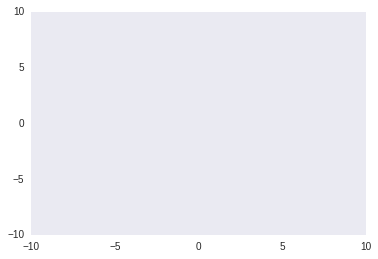

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
#im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

In [1]:
from helpers import make_word_cloud, tokenize_content

In [6]:
make_word_cloud(25)

In [7]:
import matplotlib.pyplot as plt
plt.show()